In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### Import Data

In [85]:
df = pd.read_csv('../dataset/Diabetes.csv')
df

,Unnamed: 0,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


#### 1. Data Understanding

In [86]:
print("Data Shape : ", df.shape)

Data Shape :  (768, 10)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Kehamilan                 768 non-null    int64  
 2   Glukosa                   768 non-null    int64  
 3   Tekanan Darah             768 non-null    int64  
 4   Ketebalan Kulit           768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Umur                      768 non-null    int64  
 9   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [88]:
df[['Kehamilan', 'Tekanan Darah', 'Umur', 'BMI']].describe()

,Kehamilan,Tekanan Darah,Umur,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,33.240885,31.992578
std,3.369578,19.355807,11.760232,7.884160
min,0.000000,0.000000,21.000000,0.000000
25%,1.000000,62.000000,24.000000,27.300000
50%,3.000000,72.000000,29.000000,32.000000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


In [89]:
df.Hasil.value_counts()

Hasil
0    500
1    268
Name: count, dtype: int64

#### 2. Cleaning Data

In [90]:
df.isnull().sum()

Unnamed: 0                  0
Kehamilan                   0
Glukosa                     0
Tekanan Darah               0
Ketebalan Kulit             0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Umur                        0
Hasil                       0
dtype: int64

In [91]:
df.duplicated().sum()

0

#### 3. Exploraty Data Analysis (EDA)

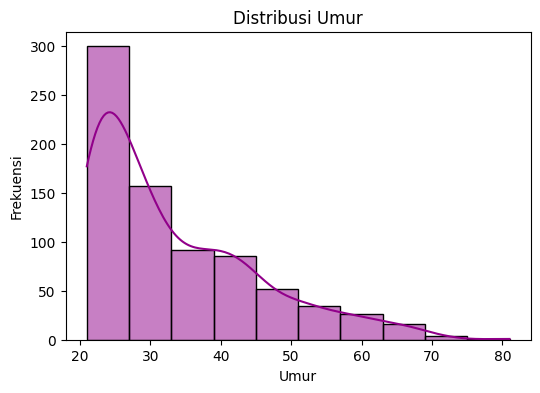

In [92]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Umur", bins=10, kde=True, color="#91008a")

plt.title("Distribusi Umur")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

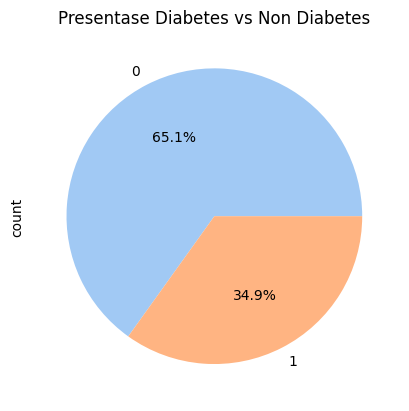

In [93]:
sns.set_palette('pastel')
df['Hasil'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Diabetes vs Non Diabetes')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7348\905457042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hasil', palette='rocket')


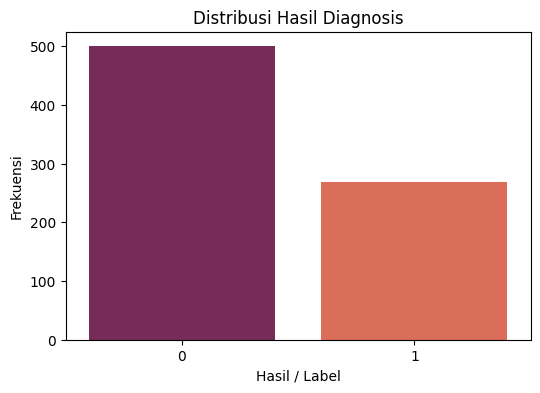

In [94]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Hasil', palette='rocket')

plt.title('Distribusi Hasil Diagnosis')
plt.xlabel('Hasil / Label')
plt.ylabel('Frekuensi')
plt.show()

In [95]:
df.corr()

,Unnamed: 0,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
Unnamed: 0,1.000000,-0.037201,0.012994,0.020953,0.019006,0.001998,0.012320,-0.040326,0.007714,-0.045184
Kehamilan,-0.037201,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glukosa,0.012994,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Tekanan Darah,0.020953,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Ketebalan Kulit,0.019006,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.001998,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.012320,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.040326,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Umur,0.007714,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Hasil,-0.045184,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

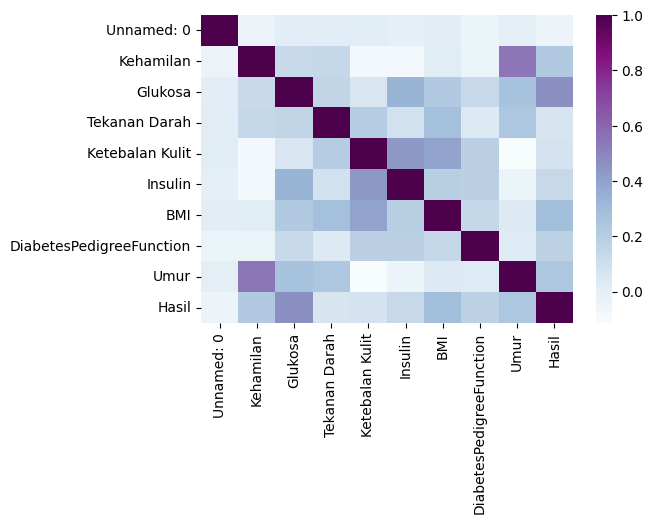

In [96]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap='BuPu')

#### 4. Preparation Data

In [97]:
x = df.drop(columns=['Hasil'])
y = df['Hasil']

print("X = ", x.shape)
print("Y = ", y.shape)

X =  (768, 9)
Y =  (768,)


In [98]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### 5. Modeling & Evaluation

In [100]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Akurasi SVM : 75.32%


#### 6. Testing

In [105]:
new_data = {'Kehamilan': [1],
            'Glukosa': [85],
            'Tekanan Darah': [66],
            'Ketebalan Kulit': [29],
            'Insulin': [0],
                'BMI': [26.6],
                'DiabetesPedigreeFunction': [0.351],
                'Umur': [31]}

new_data = pd.DataFrame(new_data)
new_data

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur
0,1,85,66,29,0,26.6,0.351,31


In [103]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Unnamed: 0
